# Import software libraries and load the dataset #

In [1]:
import sys                                             # Read system parameters.
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import matplotlib as mpl                               # Create 2D charts.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb                                   # Perform data visualization.
import sklearn                                         # Perform data mining and analysis.
from sklearn import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- Seaborn {}'.format(sb.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
diabetes = datasets.load_diabetes()
print('Loaded {} records.'.format(len(diabetes.data)))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- pandas 0.24.2
- Matplotlib 3.0.3
- Seaborn 0.9.0
- scikit-learn 0.20.3

Loaded 442 records.


# Get acquainted with the dataset

In [4]:
# Convert array to pandas DataFrame.
diabetes_raw = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
diabetes_raw['target'] = diabetes['target']

# View data types and see if there are missing entries.
print(diabetes_raw.info())

# View first 10 records.
diabetes_raw.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


# Examine the distribution of various features

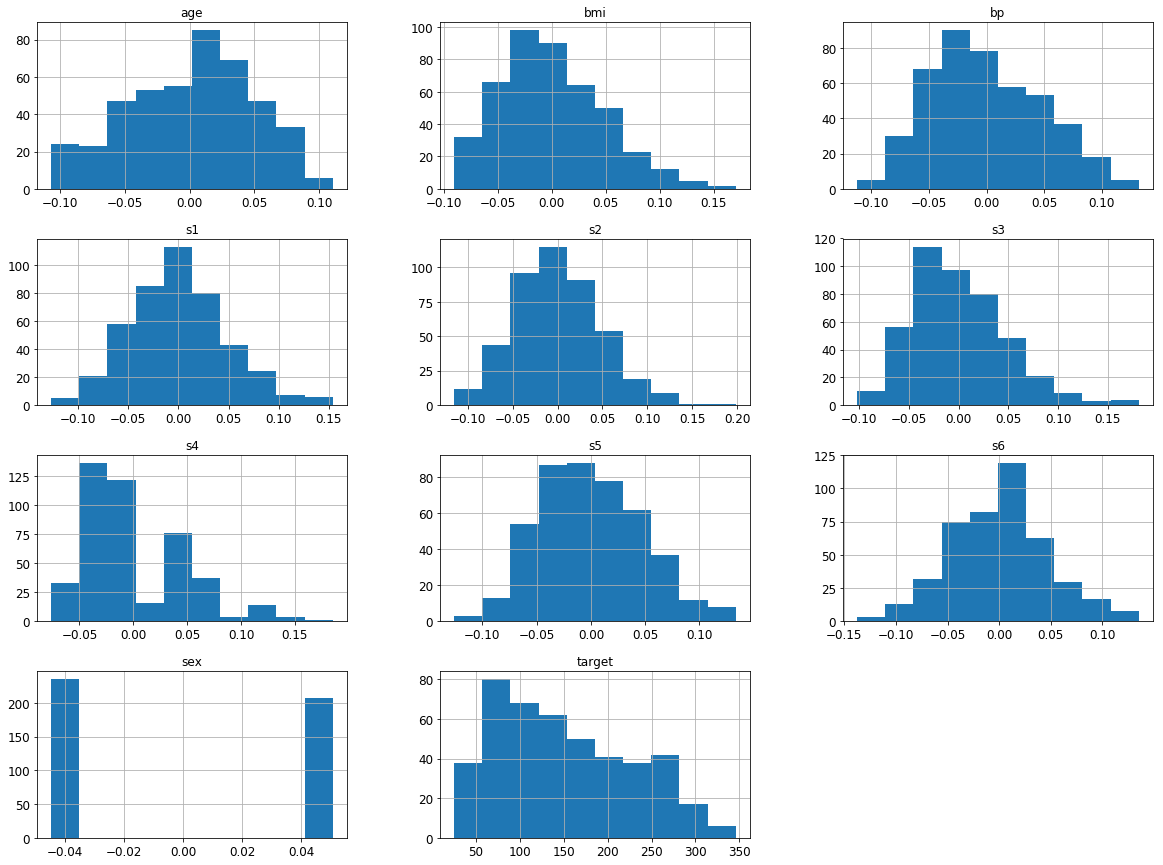

<Figure size 432x288 with 0 Axes>

In [5]:
# Use Matplotlib to plot distribution histograms for all features.
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

diabetes_raw.hist(figsize=(20,15));
plt.figure();

# Examine a general summary of statistics

In [6]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.

with pd.option_context('float_format', '{:.2f}'.format): 
    print(diabetes_raw.describe())

         age    sex    bmi     bp     s1     s2     s3     s4     s5     s6  \
count 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00   
mean   -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00   0.00  -0.00  -0.00   
std     0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   
min    -0.11  -0.04  -0.09  -0.11  -0.13  -0.12  -0.10  -0.08  -0.13  -0.14   
25%    -0.04  -0.04  -0.03  -0.04  -0.03  -0.03  -0.04  -0.04  -0.03  -0.03   
50%     0.01  -0.04  -0.01  -0.01  -0.00  -0.00  -0.01  -0.00  -0.00  -0.00   
75%     0.04   0.05   0.03   0.04   0.03   0.03   0.03   0.03   0.03   0.03   
max     0.11   0.05   0.17   0.13   0.15   0.20   0.18   0.19   0.13   0.14   

       target  
count  442.00  
mean   152.13  
std     77.09  
min     25.00  
25%     87.00  
50%    140.50  
75%    211.50  
max    346.00  


# Look for columns that correlate with `target` (disease progression)#

In [7]:
# View the correlation values for each feature compared to the label.
print('Correlations compared to the label')
print(diabetes_raw.corr()['target'].sort_values(ascending=False))

Correlations compared to the label
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


# Split the label from the dataset

In [8]:
# Split the training and test datasets and their labels.
from sklearn.model_selection import train_test_split

X, y = diabetes_raw.loc[:, 'age': 's6'], diabetes_raw[['target']]
X_train, X_test, y_train, y_test = train_test_split(X,  y)


# Compare the number of rows and columns in the original data to the training and test sets.

print(f'Original set:        {diabetes_raw.shape}')
print('------------------------------')
print(f'Training features:   {X_train.shape}')
print(f'Test features:       {X_test.shape}')
print(f'Training labels:     {y_train.shape}')
print(f'Test labels:         {y_test.shape}')

Original set:        (442, 11)
------------------------------
Training features:   (331, 10)
Test features:       (111, 10)
Training labels:     (331, 1)
Test labels:         (111, 1)


# Drop columns that won't be used for training

In [9]:
# Drop the three features that have the least correlation with the label.

def drop_unused(dataset):
    
    print('Columns before drop:\n\n{}\n'.format(list(dataset.columns)))
        
    dataset = dataset.drop(['s3'], axis = 1)
    dataset = dataset.drop(['sex'], axis = 1)
    dataset = dataset.drop(['s2'], axis = 1)
    
    print('Columns after drop:\n\n{}\n'.format(list(dataset.columns)))
    return dataset

X_train = drop_unused(X_train.copy())
X_test = drop_unused(X_test.copy())

Columns before drop:

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Columns after drop:

['age', 'bmi', 'bp', 's1', 's4', 's5', 's6']

Columns before drop:

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Columns after drop:

['age', 'bmi', 'bp', 's1', 's4', 's5', 's6']



# Create a linear regression model

In [10]:
# Construct a basic linear regression class object.

from sklearn.linear_model import LinearRegression
#(Note: Dataset is already standardized)
lin_reg = LinearRegression(fit_intercept = False)

# Fit the training data to the regression object.
lin_reg.fit(X_train, np.ravel(y_train))

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

# Compare the first ten predictions to actual values

In [11]:
# Make predictions on the test set.
predict = lin_reg.predict(X_test)

results_comparison = X_test.copy()
results_comparison['Predicted'] = np.round(predict, 2)
results_comparison['Actual'] = y_test.copy()


# View examples of the predictions compared to actual disease progression.
results_comparison.head(10)

,age,bmi,bp,s1,s4,s5,s6,Predicted,Actual
333,0.027178,-0.006206,0.028758,-0.016704,0.034309,0.029300,0.032059,32.72,164.0
239,0.023546,0.019662,-0.012556,0.083740,-0.002592,0.066048,0.048628,43.74,262.0
348,0.030811,-0.020218,-0.005671,-0.004321,-0.039493,-0.010904,-0.001078,-21.19,148.0
41,-0.099961,-0.067641,-0.108957,-0.074494,-0.039493,-0.049868,-0.009362,-125.95,55.0
147,-0.056370,0.092953,-0.019442,0.014942,0.025453,0.026056,0.040343,69.22,128.0
372,-0.027310,-0.023451,-0.015999,0.013567,-0.002592,-0.010904,-0.021788,-37.07,71.0
379,-0.001882,-0.038540,0.021872,-0.108893,-0.076395,-0.046879,0.023775,-54.70,40.0
77,-0.096328,-0.036385,-0.074528,-0.038720,-0.039493,-0.074089,-0.001078,-117.66,200.0
206,0.001751,0.026128,-0.009113,0.024574,0.034309,0.009436,0.003064,27.29,196.0
108,0.019913,0.045529,0.029906,-0.062111,0.026929,0.045601,0.040343,88.63,232.0


# Calculate the error between predicted and actual values

In [12]:
# Print the mean squared error (MSE) for the model's predictions on the test set.
from sklearn.metrics import mean_squared_error as mse

MSE = mse(y_test, predict)
print('MSE: {:.2f}'.format(MSE))

MSE: 30517.38


# Plot lines of best fit for four features

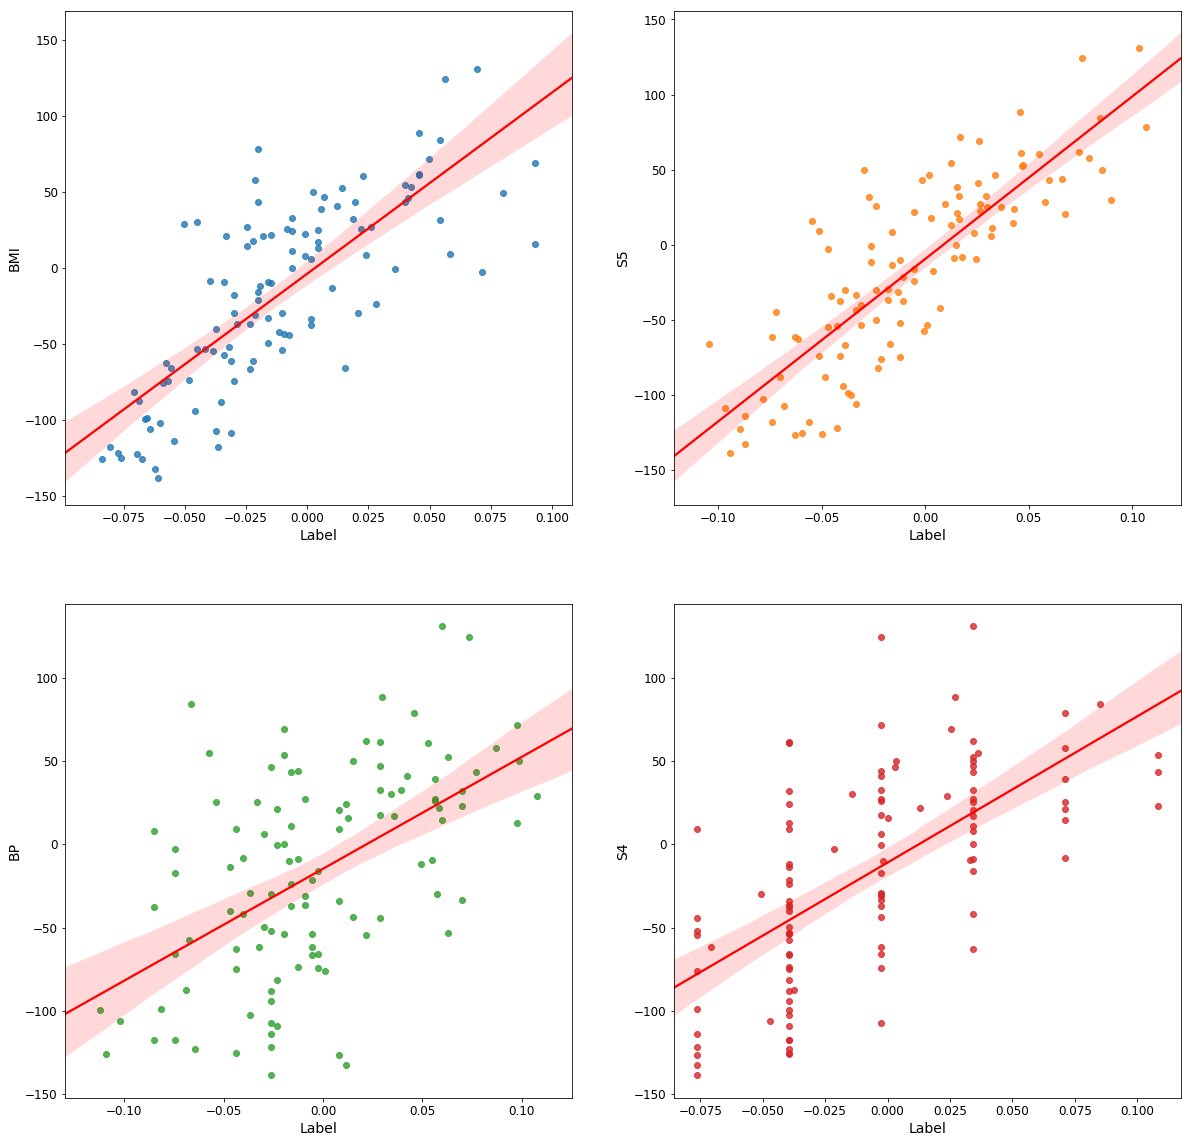

In [17]:
# Use Seaborn to create subplots for the four features that have the strongest correlation with the label.
import seaborn as sns


line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#BMI

ax1 = sns.regplot(x=X_test.bmi, y=predict, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("Label")
ax1.set_ylabel("BMI")


#s5

ax2 = sns.regplot(x=X_test.s5, y=predict, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("Label")
ax2.set_ylabel("S5")


#bp

ax3 = sns.regplot(x=X_test.bp, y=predict, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("Label")
ax3.set_ylabel("BP")

#s4

ax4 = sns.regplot(x=X_test.s4, y=predict, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("Label")
ax4.set_ylabel("S4")

plt.show()